In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import os
from glob import glob

In [3]:
companies = ["AMAZON", "APPLE", "META", "GOOGLE", "NETFLIX"]
frequency = "daily"
path = os.getcwd()

files = glob(f"/diploma_info/data/*_{frequency}.csv")
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [4]:
columns = ['open_price', 'highest_price', 'lowest_price', 'close_price', 'adj_close_price', 'volume']

meta = pd.read_csv(
    files[2], 
    parse_dates=['Date'],
    date_parser=dateparse,
    index_col=['Date']
)
meta.columns = columns
meta.index.name = 'date'

C:\Users\Admin\AppData\Local\Temp\ipykernel_15660\892827597.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  meta = pd.read_csv(


In [5]:
meta['year'] = meta.index.year
meta['month'] = meta.index.month
meta['day'] = meta.index.day
meta['day_of_week'] = meta.index.weekday
meta['week_of_year'] = (meta.index.isocalendar()['week']).astype('int')

<Axes: >

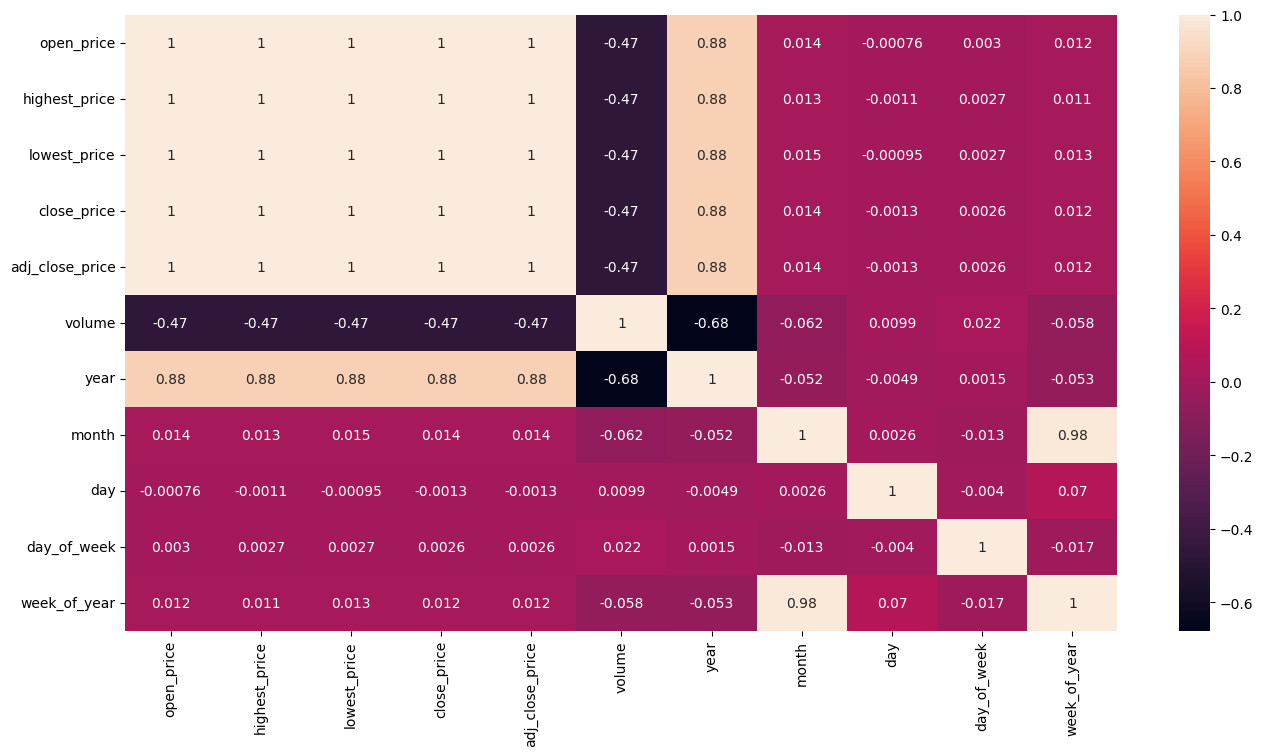

In [6]:
sns.heatmap(meta.corr(), annot=True)

In [7]:
meta

,open_price,highest_price,lowest_price,close_price,adj_close_price,volume,year,month,day,day_of_week,week_of_year
date,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,8,19,3,34
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,8,20,4,34
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,8,23,0,35
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,8,24,1,35
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,8,25,2,35
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,140.889999,143.880005,138.169998,143.539993,143.539993,42116900,2024,2,2,4,5
2024-02-05,144.039993,146.669998,143.910004,144.929993,144.929993,29254400,2024,2,5,0,6
2024-02-06,145.960007,146.740005,144.520004,145.410004,145.410004,21517700,2024,2,6,1,6


In [8]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4902 entries, 2004-08-19 to 2024-02-08
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open_price       4902 non-null   float64
 1   highest_price    4902 non-null   float64
 2   lowest_price     4902 non-null   float64
 3   close_price      4902 non-null   float64
 4   adj_close_price  4902 non-null   float64
 5   volume           4902 non-null   int64  
 6   year             4902 non-null   int32  
 7   month            4902 non-null   int32  
 8   day              4902 non-null   int32  
 9   day_of_week      4902 non-null   int32  
 10  week_of_year     4902 non-null   int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 363.8 KB


In [9]:
meta.describe()

,open_price,highest_price,lowest_price,close_price,adj_close_price,volume,year,month,day,day_of_week,week_of_year
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4.902000e+03,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000
mean,42.380328,42.829433,41.953549,42.400256,42.400256,1.180521e+08,2013.860465,6.588535,15.738678,2.024888,26.839453
std,39.575646,40.025097,39.178681,39.609017,39.609017,1.508373e+08,5.629965,3.448903,8.761925,1.398469,15.070241
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05,2004.000000,1.000000,1.000000,0.000000,1.000000
25%,12.873311,13.001704,12.758179,12.875054,12.875054,2.823350e+07,2009.000000,4.000000,8.000000,1.000000,14.000000
50%,26.656171,26.868106,26.432092,26.659662,26.659662,5.971500e+07,2014.000000,7.000000,16.000000,2.000000,27.000000
75%,58.359500,58.848876,57.843875,58.390248,58.390248,1.459671e+08,2019.000000,10.000000,23.000000,3.000000,40.000000
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09,2024.000000,12.000000,31.000000,4.000000,53.000000
